In [92]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp
import math as m

from utils.tracking import extract, find_params
from utils.function import fit_xrdV1, pseudovoigt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)



%matplotlib inline

In [2]:
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/2D_3D_hum_light/quarter'

infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

data = extract(infiles[0])

# # finding the start and end of an array for the 001 plane
# x1_111 = np.where(abs(data[:,0]-.9)<= .01)
# ind1 = x1_111[0][0]
# x2_111 = np.where(abs(data[:,0]-1.15)<= .01)
# ind2 =x2_111[0][0]

data_file = []
time = []
file_num = []
file_index = []

kx = 0

for i in range(len(infiles)):
    data = extract(infiles[i])
    
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' not in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time.append(float(time_val))

    data_file.append(data)

    file_num.append(int(parameters[1]))

    # print(parameters)

    if float(time_val) == 0.0:
        file_start = int(parameters[1])
        print('here')

    file_index.append(i)

    # print(infiles[i])
    # print(parameters)

 
final_time = []
final_index = []

for i in range(len(file_num)):
    if file_num[i] < file_start:
        print(file_num[i])
        print(file_start)
        continue
    else:
        final_time.append(time[i]) 
        final_index.append(file_index[i])


print(final_index)
print(final_time)


here
1
2
[0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 31, 32, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 49, 50, 51, 53, 54, 56, 58, 59, 60, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 75, 76, 78, 80, 81, 82, 84, 85, 86, 88, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 119, 120]
[4267.8, 4327.3, 4384.0, 4440.8, 4500.4, 4557.2, 4692.3, 4694.2, 346.2, 4750.9, 4807.8, 4867.3, 4924.2, 4981.1, 5040.6, 5097.4, 5154.3, 402.9, 5213.7, 5270.6, 459.8, 519.3, 576.0, 632.9, 692.3, 749.1, 805.9, 865.3, 922.1, 978.9, 1038.4, 1095.2, 1151.9, 0.0, 1211.5, 1268.2, 1325.0, 1384.6, 1441.4, 1498.1, 1557.6, 1614.4, 1671.1, 1730.6, 1787.5, 1844.2, 1903.7, 1960.5, 2017.4, 113.6, 2076.9, 2133.7, 2190.5, 2250.0, 2306.9, 2363.7, 2423.1, 2479.9, 2536.8, 2596.3, 2653.2, 2710.0, 2769.5, 2826.3, 2883.0, 173.1, 2942.6, 2999.4, 3056.2, 3115.7, 3172.6, 3229.3, 3288.8, 3345.5, 230.0, 3402.3, 3461.8, 3518.7, 3575.5, 363

In [3]:
final_time = np.array(final_time)
final_index = np.array(final_index)

indx = np.argsort(final_time)
final_time = final_time[indx]
final_index = final_index[indx]

0.0


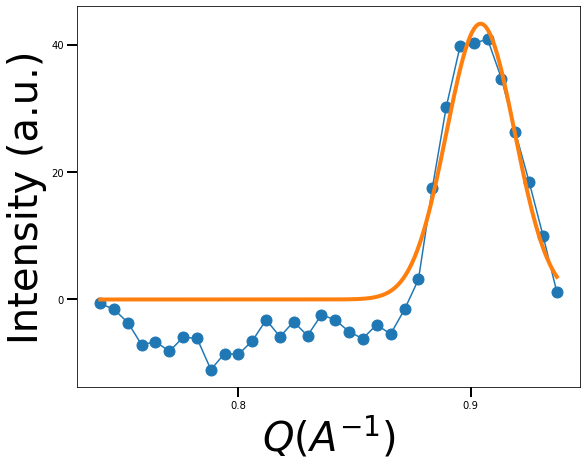

632.9


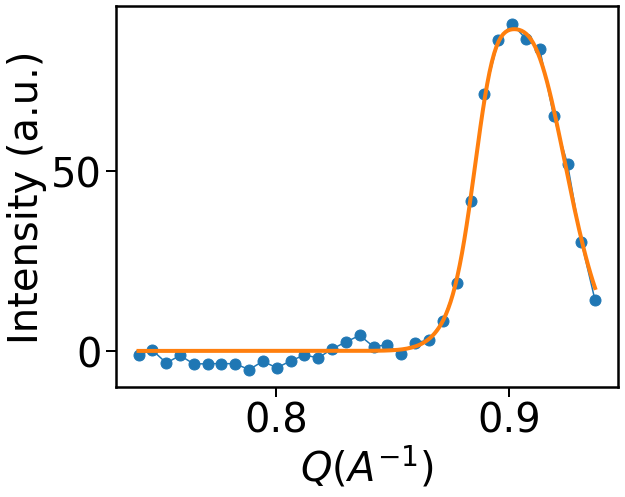

1211.5


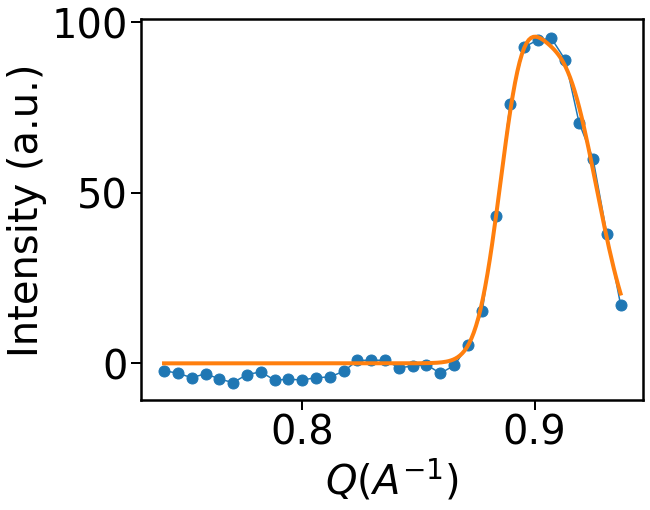

1787.5


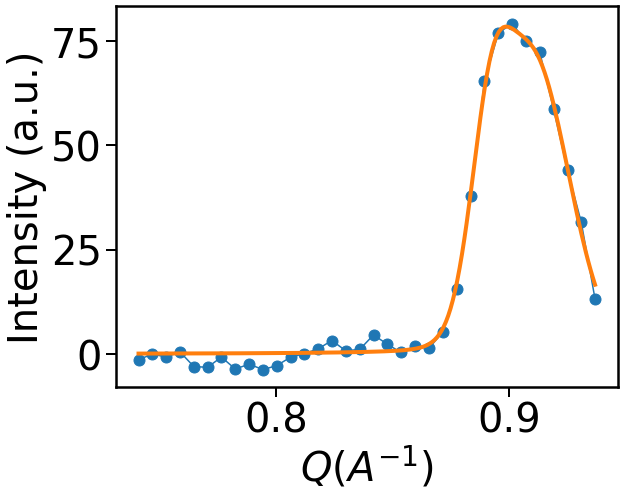

2363.7


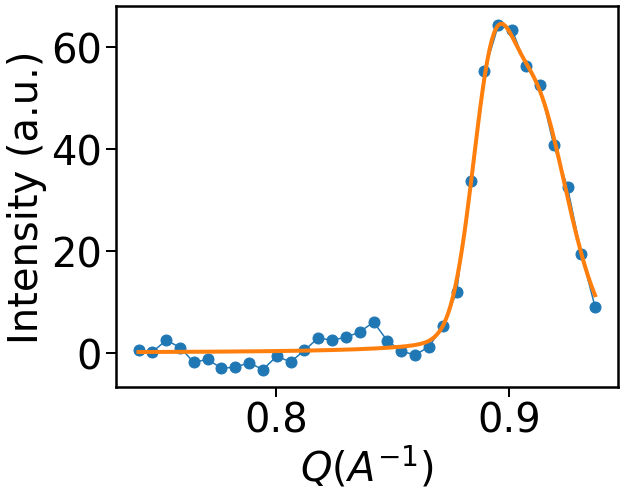

2942.6


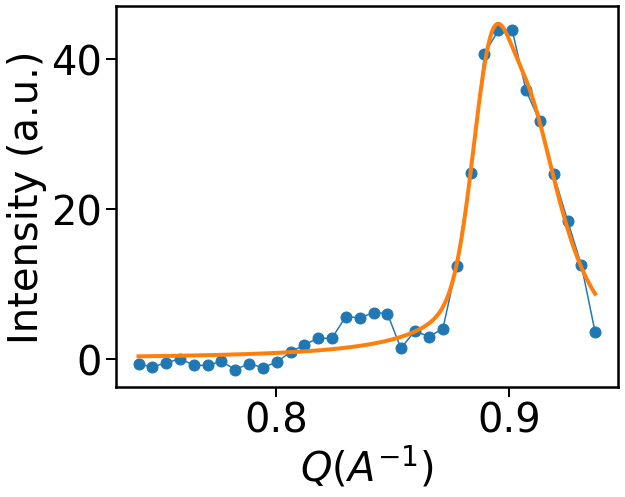

3518.7


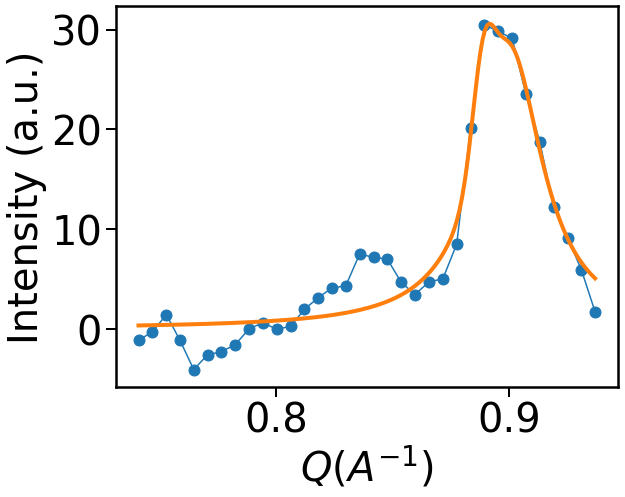

4094.7


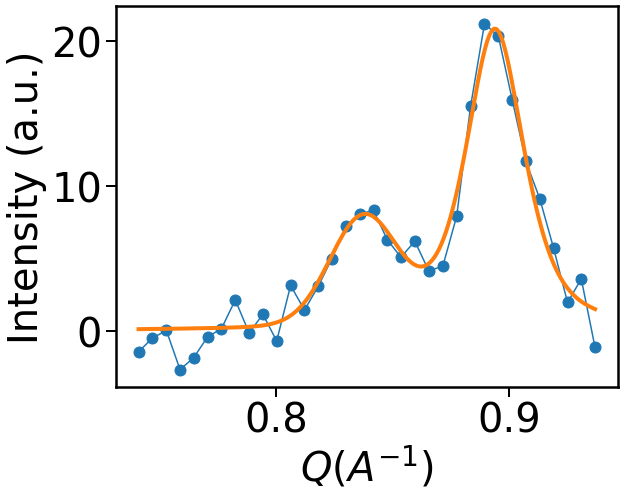

4694.2


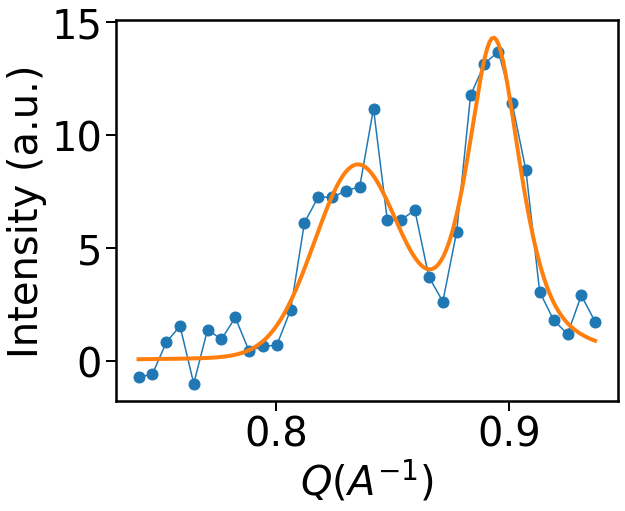

5270.6


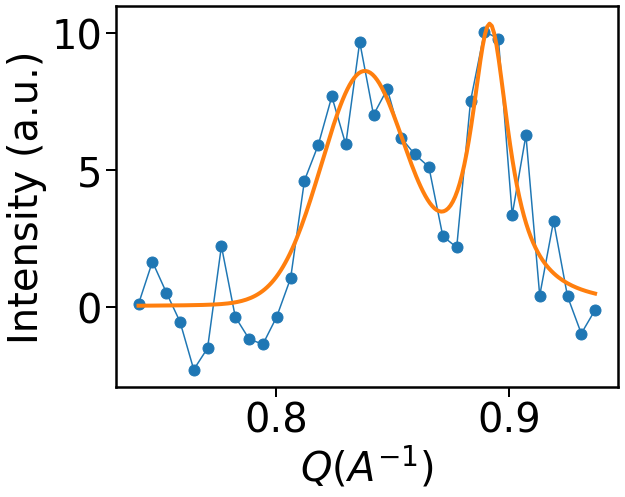

In [4]:
extra2 = []

# xdata_ss = []

for i, index in enumerate(final_index):
    data = extract(infiles[index])

    # for the 111 peak
    range =[.75,.95, 2]
    bg_range=[.7,.97]
    int_gues= [20, .82, 0.01, 0.01, 20, .9, 0.01, 0.01]

    # for the new degradation peak
    # range =[.52,.62, 1]
    # bg_range=[.45,.66]
    # int_gues= [10, .56, 0.01, 0.01, 0, 0]


    if i%10 == 0:
        plotting = True
        print(final_time[i])
    else:
        plotting = False

    parms,xdata, ydata = fit_xrdV1(data, range = range,bg_range=bg_range , parms= int_gues, extra2= extra2, adapt= [], background_linear= False, plot = plotting)
    extra2 = parms

    ydata = ydata/max(ydata)
    if i == 0:
        ydata_s = ydata.reshape(-1,1)
    else: 
        ydata_s = np.concatenate((ydata_s,ydata.reshape(-1,1)), axis = 1)


    # if range[2] ==1:
    #     y = pseudovoigt(parms[0:4])

    # print(ydata.shape)
    # if i > 3:
    #     break
    

    


In [5]:
cif_dir = 'C:/Users/Bin'+chr(39)+'s X1/Box/Cif files'
BA1= np.loadtxt(cif_dir+'/ba n1.xy')
BA2= np.loadtxt(cif_dir+'/BA_n2.xy')
BA3= np.loadtxt(cif_dir+'/BA_n3.xy')
BA4= np.loadtxt(cif_dir+'/BA_n4.xy')
MAPI = np.loadtxt(cif_dir +'/MAPbI3.xy')
PbI2 = np.loadtxt(cif_dir +'/PbI2.xy')

q = lambda x: (4*np.pi/.9184)*np.sin(x/2*np.pi/180)

In [13]:
from utils.function import data_explore

for i, index in enumerate(final_index):
    data = extract(infiles[index])

    # for the 111 peak
    range =[.75,.96, 2]
    bg_range=[.7,.98]


    xdata, ydata = data_explore(data, range = range, bg_range=bg_range )

    if i == 0:
        ydata_s = ydata.reshape(-1,1)
    else: 
        ydata_s = np.concatenate((ydata_s,ydata.reshape(-1,1)), axis = 1)


    # plt.plot(xdata,ydata)
    # plt.show()



C:\Users\BIN'SX~1\AppData\Local\Temp/ipykernel_13532/3033863479.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,np.transpose(ydata_s))


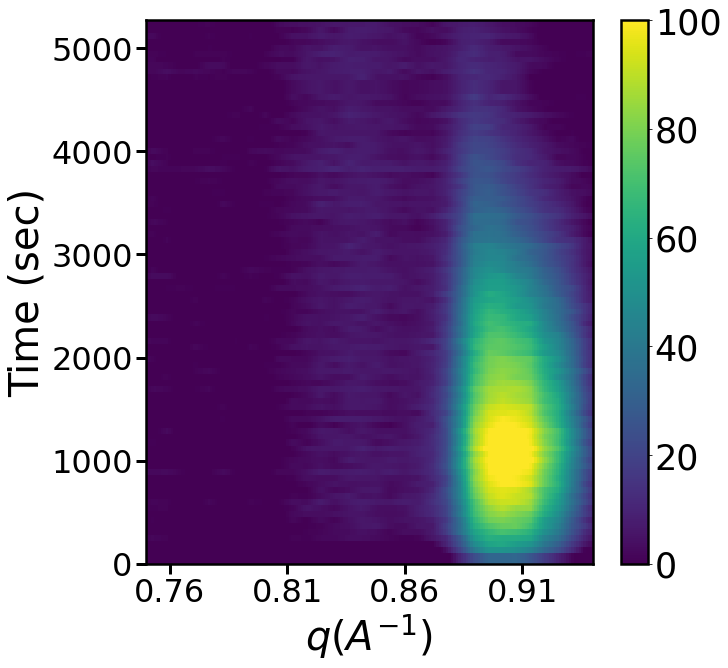

In [22]:
X,Y = np.meshgrid(xdata,final_time)
plt.figure(figsize= (10,10))
ax = plt.gca()
plt.pcolor(X,Y,np.transpose(ydata_s))
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=3)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.xticks(np.arange(.76,.95,step = .05))
plt.xlim(.75,.94)
plt.clim([0,100])
plt.xlabel(r"${q(A^{-1})}$",fontsize = 40)
plt.ylabel('Time (sec)', fontsize = 40)
plt.rcParams.update({'font.size': 35})
plt.colorbar()

In [26]:
from utils.function import data_explore

for i, index in enumerate(final_index):
    data = extract(infiles[index])

    # for the 111 peak
    range =[.95,1.1, 2]
    bg_range=[.93,1.15]


    xdata, ydata = data_explore(data, range = range, bg_range=bg_range )

    if i == 0:
        ydata_s = ydata.reshape(-1,1)
    else: 
        ydata_s = np.concatenate((ydata_s,ydata.reshape(-1,1)), axis = 1)


    # plt.plot(xdata,ydata)
    # plt.show()



C:\Users\BIN'SX~1\AppData\Local\Temp/ipykernel_13532/1705423003.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,np.transpose(ydata_s))


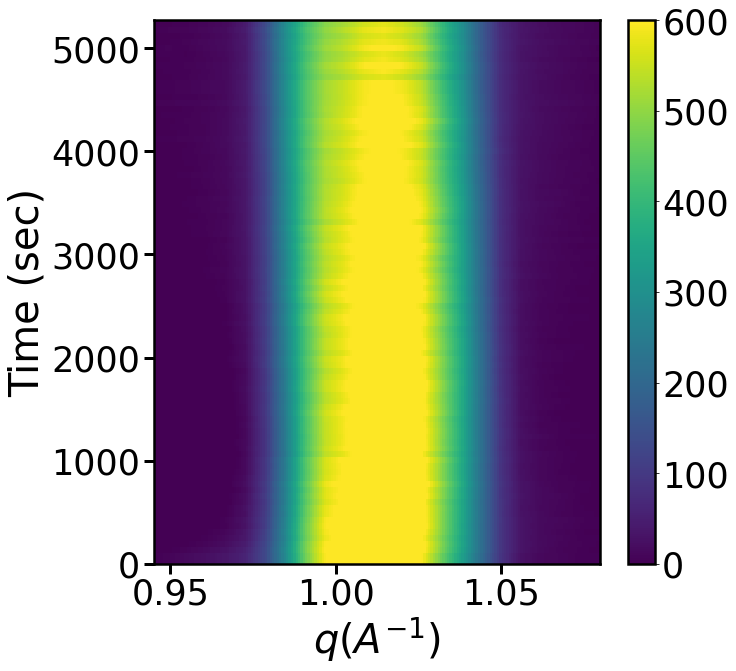

In [35]:
X,Y = np.meshgrid(xdata,final_time)
plt.figure(figsize= (10,10))
ax = plt.gca()
plt.pcolor(X,Y,np.transpose(ydata_s))
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=3)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.xticks(np.arange(range[0],range[1],step = .05))
plt.xlim(.945,1.08)
plt.clim([0,600])
plt.xlabel(r"${q(A^{-1})}$",fontsize = 40)
plt.ylabel('Time (sec)', fontsize = 40)
plt.rcParams.update({'font.size': 35})
plt.colorbar()

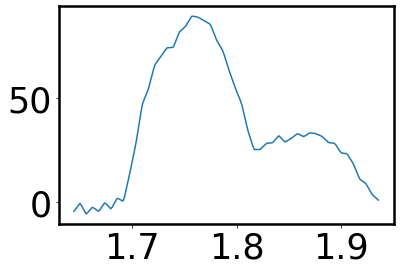

In [118]:
from utils.function import data_explore

for i, index in enumerate(final_index):
    data = extract(infiles[index])

    # range =[1.37,1.65, 1]
    # bg_range=[1.35,1.7]

    # for the 111 peak
    range =[1.65,1.95, 1]
    bg_range=[1.6,1.97]


    xdata, ydata = data_explore(data, range = range, bg_range=bg_range )

    # ydata = ydata/max(ydata)
    if i == 0:
        ydata_s = ydata.reshape(-1,1)
    else: 
        ydata_s = np.concatenate((ydata_s,ydata.reshape(-1,1)), axis = 1)


plt.plot(xdata,ydata)
plt.show()

C:\Users\BIN'SX~1\AppData\Local\Temp/ipykernel_13532/1160217490.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,np.transpose(ydata_s))


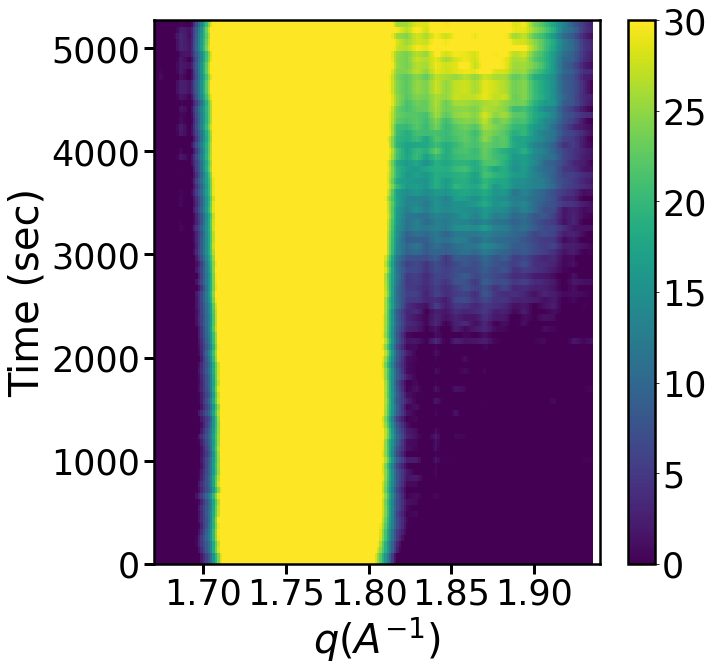

In [122]:
X,Y = np.meshgrid(xdata,final_time)
plt.figure(figsize= (10,10))
ax = plt.gca()
plt.pcolor(X,Y,np.transpose(ydata_s))
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=3)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.xticks(np.arange(range[0]-.2,range[1],step = .05))
plt.xlim(1.67,1.94)
plt.clim([0,30])
plt.xlabel(r"${q(A^{-1})}$",fontsize = 40)
plt.ylabel('Time (sec)', fontsize = 40)
plt.rcParams.update({'font.size': 35})
plt.colorbar()

(0.2, 2.2)

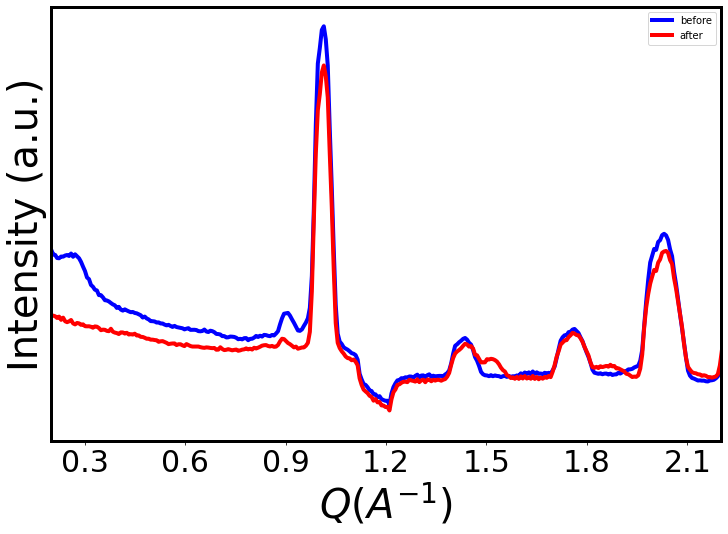

In [102]:
data = extract(infiles[final_index[70]])
data1 = extract(infiles[final_index[0]])

data = data[20:, :]
data1 = data1[20:, :]

plt.figure(figsize= (12,8))
# ax = plt.gca()
plt.plot(data1[:,0],data1[:,1]-np.min(data1[:,1]), 'b', label = 'before', linewidth = 4)
plt.plot(data[:,0],data[:,1]-np.min(data[:,1]), 'r', label = 'after', linewidth = 4)
plt.yticks([])
plt.xticks(np.arange(.3,2.2, .3), fontsize = 30)
plt.ylabel('Intensity (a.u.)',fontsize = 40)
plt.xlabel(r"${Q(A^{-1})}$",fontsize = 40)
plt.rc('axes', linewidth=3)
plt.legend()


plt.xlim([.2,2.2])
# plt.ylim([0,.3])


In [52]:
q = lambda x: (4*np.pi/1.5406)*np.sin(x/2*np.pi/180)

In [57]:
theta = lambda q: np.arcsin((1.5406*q/(4*m.pi)))*360/m.pi

In [60]:
theta(1.55)

print(2*m.pi/1.55)

4.053667940115862
